***Importing packages***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [8]:
import warnings
warnings.filterwarnings('ignore')

***Reading data***

In [9]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

***Splitting data into train and test***

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***Building model***

In [11]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

***Voting Classifier***

In [12]:
estimators = [('Logistic Regression', lr), ('Decision Tree', dt)]

In [13]:
vc = VotingClassifier(estimators)
vc.fit(X_train, y_train)
vc.score(X_test, y_test)

1.0

***Averaging***

In [19]:
lr_pred = lr.fit(X_train, y_train).predict_proba(X_test)
dt_pred = dt.fit(X_train, y_train).predict_proba(X_test)

In [20]:
final_pred = (lr_pred+dt_pred)/2

***Random Forest***

In [22]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rf.score(X_test, y_test)

1.0

In [23]:
rf.feature_importances_

array([0.11189953, 0.02186047, 0.46155452, 0.40468548])

In [24]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

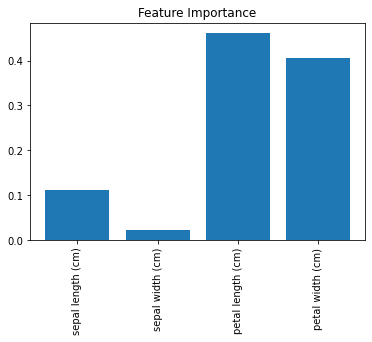

In [31]:
plt.bar(X.columns, rf.feature_importances_)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

***AdaBoost***

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
ab = AdaBoostClassifier(n_estimators=100, base_estimator=dt, learning_rate=0.1)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab.score(X_test, y_test)

1.0

***Gradient Boosting***

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

1.0